
*Мои таски: 1.1, 2.4, 3.3, 4.1, 5.2, 6.1


# Задача 1.1
Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:

* Нормальное
* Лапласа
* Стьюдента
* Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

##  Мощность

In [ ]:
import numpy as np
import scipy.stats as st
from statsmodels.stats.diagnostic import kstest_normal

import matplotlib.pyplot as plt

In [ ]:
def power_crit( X, crit , p =5e-2 ) :
    value = []
    cnt = 0
    for x in X :
        cnt+= crit(x,p)
    return cnt/X.shape[0]

In [ ]:
X_normal = st.norm(1,2).rvs(size = (100 ,1000))
X_laplace = st.laplace(1,5).rvs(size = (100 ,1000))
X_student = st.t(1).rvs(size=(100 ,1000))
X_normal_cut = st.truncnorm(1,2).rvs(size = (100,1000))

distributions = [X_normal , X_laplace,X_student,X_normal_cut]

In [ ]:
alpha_normal = power_crit(X_normal , lambda x, alpha : kstest_normal(x, dist='norm', pvalmethod='approx')[1] < alpha)
power_laplace = power_crit(X_laplace , lambda x, alpha : kstest_normal(x, dist='norm', pvalmethod='approx')[1] < alpha )
power_student = power_crit(X_student , lambda x ,alpha: kstest_normal(x, dist='norm', pvalmethod='approx')[1] < alpha)
power_normal_cut = power_crit(X_normal_cut , lambda x, alpha : kstest_normal(x, dist='norm', pvalmethod='approx')[1] < alpha)

In [ ]:
print('alpha : ',alpha_normal)
print('power H1: laplace :',power_laplace )
print('power H1: student :',power_student )
print('power H1 : normal cut :' ,power_normal_cut)


alpha :  0.02
power H1: laplace : 1.0
power H1: student : 1.0
power H1 : normal cut : 1.0


In [ ]:
alpha_normal = power_crit(X_normal , lambda x,alpha : st.jarque_bera(x)[1] < alpha)
power_laplace = power_crit(X_laplace , lambda x,alpha : st.jarque_bera(x)[1] < alpha)
power_student = power_crit(X_student , lambda x,alpha : st.jarque_bera(x)[1] < alpha)
power_normal_cut = power_crit(X_normal_cut , lambda x,alpha : st.jarque_bera(x)[1] < alpha)

In [ ]:
print('alpha : ',alpha_normal)
print('power H1: laplace :',power_laplace )
print('power H1: student :',power_student )
print('power H1 : normal cut :' ,power_normal_cut)


alpha :  0.02
power H1: laplace : 1.0
power H1: student : 1.0
power H1 : normal cut : 1.0


In [ ]:
alpha_normal = power_crit(X_normal , lambda x,alpha : st.shapiro(x)[1] < alpha)
power_laplace = power_crit(X_laplace , lambda x,alpha : st.shapiro(x)[1] < alpha)
power_student = power_crit(X_student , lambda x,alpha : st.shapiro(x)[1] < alpha)
power_normal_cut = power_crit(X_normal_cut , lambda x,alpha : st.shapiro(x)[1] < alpha)

In [ ]:
print('alpha : ',alpha_normal)
print('power H1: laplace :',power_laplace )
print('power H1: student :',power_student )
print('power H1 : normal cut :' ,power_normal_cut)


alpha :  0.01
power H1: laplace : 1.0
power H1: student : 1.0
power H1 : normal cut : 1.0


Как видим по alpha_normal , критерии достаточно консервативные, ведь эмпирические ошибки первого рода значительно меньше чем 0.05

# Задача 2.4
Одеяла с электрообогревом применяются в хирургии для восстановления температуры тела пациента после операции. Имеются два вида одеял: стандартный (b0) и экспериментальный (b1).

Для 14 пациентов известно время, за которое нормальная температура тела восстанавливается при использовании одеяла каждого из видов.

Как понять, отличаются ли экспериментальные одеяла от стандартного?

### Требуется:

1. Записать задачу формально в виде проверяемой гипотезы и альтернативы.

2. Предложить не менее 2-х критериев и соответствующих статистик для проверки этой гипотезы и описать:
* при каких дополнительных условиях (если они есть) стоит применять тот или иной критерий
* в чём преимущества/недостатки того или иного критерия
3. Аналитически выразить достигаемый уровень значимости каждого критерия на выборке или опишите, как его получить с помощью табличных данных.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

* каждый пациент использует оба одеяла на себе, то есть у нас будет две связанные выборки

* А проверить нужно , что среднее выборки b0 = b1 (H0) , H1 : b0 != b1

* Можно проверить выборки на нормальность, в случае p_value > уровня значимости применить z критерий для проверки равенства матожиданий с двусторонней альтернативой

* В противном случае применить : двухвыборочный перестановочный критерий в предположении симметричности попарных разностей

* Либо применить Критерий знаковых рангов Уилкоксона для связанных выборок, но изменив постановку задачи на проверку равенства медиан выборок. Так же альтернатива двусторонняя.

* Конечно лучше , если мы больше знаем о модели генерации выборки, например ее нормальность.


Достигаемый уровень значимости для Z -критерия: по ЦПТ статистика сходится к нормальному (0,1) распределению (статистика z критерия -- по сути левая часть ЦПТ) , мы проверяем двухсторонню альтернативу -- потому достигаемый уровень значимости, это вероятность попасть в два хвоста распределения, а то есть : 2*(1 - F(|x|))


В случае двухвыборочного перестановочного: фиксируем n, порождаем выборку перестановкой знаков в сумме единиц от 1 до n, по полученному массиву считаем эмпирическую функцию распределения F. Аналогично z критерию достигаемый уровень значимости будет вида  2*(1 - F(|x|))

В случае ранговых знаков - распределение табличное. Берем х , находим в таблице ближайший [x] , с p_value  не меньше нашего , используем его для нахождения F([x]) . Далее считаем , аналогично тому что выше , : 2*(1 - F([|x|}))

# Задача 3.3
Выборка: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Предложить метод выбора наиболее важных признаков для логистической регрессии на основе изученных методов прикладной статистики. Осуществить выбор.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr
data = load_wine()
X = data.data
y = data.target
X.shape , y.shape

((178, 13), (178,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train , y_train)
print('Accuracy: ' , np.mean(model.predict(X_test) == y_test) )

Accuracy:  0.9722222222222222


In [ ]:
corrs = dict([(i ,[]) for i in range(X.shape[1])])
for j in range(X.shape[1]) :
    for i in range(X.shape[1]) :
        if i > j :
            if pearsonr(X_train[:,i], X_train[:,j] )[1] < 0.05 :
                corrs[j].append(i)

In [ ]:
features_max_corrs = sorted(corrs.items() , key = lambda x : -len(x[1]))
indices = [x[0] for x in features_max_corrs]

In [ ]:
indices

[1, 0, 3, 5, 6, 2, 4, 7, 8, 9, 10, 11, 12]

In [ ]:
model = LogisticRegression(solver='lbfgs')
selected = indices[5:]
model.fit(X_train[:,selected] , y_train)
print('Accuracy: ' , np.mean(model.predict(X_test[:,selected]) == y_test) )

Accuracy:  0.9722222222222222


* Используя корелляцию Пирсона мы определяли корреллирующие пары с уровнем значимости 0.05

* Потом мы отсеяли признаки, скореллированные со многими другими признаками.

* Отсеяв топ 5 самых скореллированных признаков, получили такое же качество на той же модели

# Задача 4.1
Рассмотрим данные из табллицы по числу заболевших и выздоровевших от короновируса в разных странах. Требуется проверить гипотезу о тому, что число выздоровевших людей в странах не зависит от числа заболевших в стране.

https://github.com/andriygav/PSAD/blob/master/labs/lab1/data/corona.csv


### Требуется:

1. записать задачу формально;
2. предложить статистику для решения данной задачи;
3. записать приближенно нулевое распределение данной статистики;
4. записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости alpha = 0.05;
5. проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезу?
6. на уровне значимости alpha = 0.05 найти зависимость мощности критерия в зависимости от истинного значения статистики.
7. Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/corona.csv"

df = pd.read_csv(url)

In [ ]:
x = df['заболевшие'].values
y = df['выздоровевшие'].values

In [ ]:
kstest_normal(x, dist='norm', pvalmethod='approx')

(0.4087264157556376, 1.8547122639639073e-12)

In [ ]:
kstest_normal(y, dist='norm', pvalmethod='approx')

(0.47371449585242914, 4.9578902443544396e-17)

Данные явно не нормальные, так что корелляция Пирсона будет не эффективной для этих вырок

* Предлагается взять статистику: корелляцию Спирмена

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import t

Нулевое распределение статистики

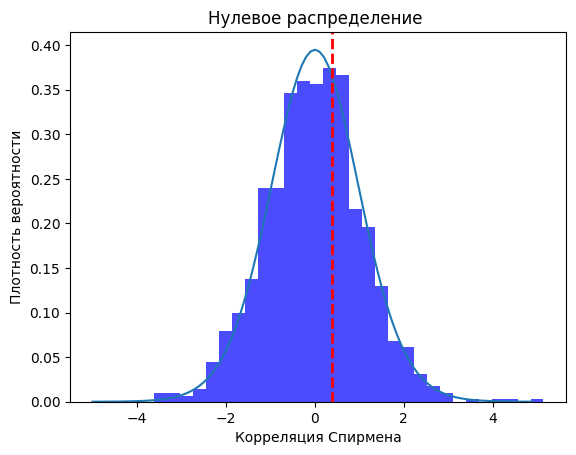

In [ ]:
num_permutations = 1000
permutation_correlations = []
for _ in range(num_permutations):
    permuted_Y = np.random.permutation(y)
    rho, _ = spearmanr(x, permuted_Y)
    T = rho * np.sqrt(len(y) - 2) / np.sqrt(1 - rho**2)

    permutation_correlations.append(T)
plt.hist(permutation_correlations, bins=30, density=True, alpha=0.7, color='blue')
arr = np.arange(-5 , 5 , 0.1)
plt.plot(arr  ,  [t.pdf(j, df=len(x)-2) for j  in arr ])

observed_corr, _ = spearmanr(x, y)
plt.axvline(observed_corr, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Корреляция Спирмена')
plt.ylabel('Плотность вероятности')
plt.title('Нулевое распределение ')
plt.show()

In [ ]:
rho, _ = spearmanr(x, y)
T = rho * np.sqrt(len(y) - 2) / np.sqrt(1 - rho**2)

In [ ]:
2*( 1 - t.cdf(np.abs(T), df=len(x)-2))

0.05873050480470665

* Данные не противоречат нулевой гипотезе о независимости распределений х и у

* Найдем зависимость мощности от rho

* Возьмем в качестве H1 выборки из нормальных распределний, которые будут скореллированы с коэффициентом rho

In [ ]:
import numpy as np

def generate_correlated_normal(rho, n_samples):
    x = np.random.normal(0, 1, n_samples)
    y = np.random.normal(0, 1, n_samples)
    z = rho * x + np.sqrt(1 - rho**2) * y
    return x, z

def p(X,Y) :
    rho, _ = spearmanr(X, Y)
    T = rho * np.sqrt(len(Y) - 2) / np.sqrt(1 - rho**2)
    return 2*( 1 - t.cdf(np.abs(T), df=len(Y)-2))

power_arr = []
rho_arr = np.arange(-1 , 1 , 0.01)
for rho in rho_arr :
    X = np.array([generate_correlated_normal(rho , n_samples = len(x))for j in range(100)])
    power_arr.append(power_crit(X , lambda x, alpha : p(x[0] ,x[1]) < alpha))

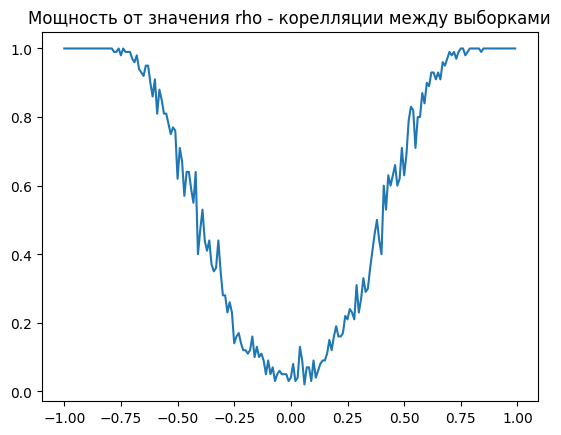

In [ ]:
plt.plot(rho_arr , power_arr)
plt.title('Мощность от значения rho - корелляции между выборками')
plt.show()

# Задача 5.2
Выборка:

https://www.kaggle.com/datasets/rtatman/speech-accent-archive

### Требуется:

1. Отобрать записи, соответствующие странам с минимум 30 респонеднтами в выборке
2. Получить сумму zero-crossing по каждой из записей
3. Провести ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15. Дискретность признака zero-crossing игнорировать.

Ссылка
https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Statistic
%ls

/content/drive/MyDrive/Statistic
reading-passage.txt  recordings/  speakers_all.csv


In [ ]:
import pandas as pd
import librosa

file_path = "/content/drive/MyDrive/Statistic/speakers_all.csv"  # Укажите путь к файлу на вашем компьютере
data = pd.read_csv(file_path)

#Фильтруем
min_respondents = 30
countries_with_min_respondents = data['native_language'].value_counts()[data['native_language'].value_counts() >= min_respondents].index
filtered_data = data[data['native_language'].isin(countries_with_min_respondents)]

In [ ]:
def zero_crossing(data):
    return len(np.where(np.diff(np.sign(np.array(data))))[0])/ len(data)

In [ ]:
def calculate_zero_crossing(name):
    file_path =  '/content/drive/MyDrive/Statistic/recordings/'+ str(name) + '.mp3'
    audio_signal, _ = librosa.load(file_path, sr=None)
    zcr = zero_crossing(audio_signal)
    return zcr

In [ ]:
calculate_zero_crossing('arabic1')

0.05451408849924946

In [ ]:
filtered_data['zero_crossing_sum'] = filtered_data['filename'].apply(calculate_zero_crossing)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('zero_crossing_sum ~ C(native_language) + C(sex) + age', data=filtered_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                      sum_sq      df          F    PR(>F)
C(native_language)  0.023165    12.0   1.850274  0.036419
C(sex)              0.018379     1.0  17.615714  0.000029
age                 0.010350     1.0   9.919957  0.001672
Residual            1.346910  1291.0        NaN       NaN


Значение F-статистики для родного языка равно 1.850 с соответствующим p-значением (PR(>F)) 0.0364. Это указывает на то, что родной язык оказывает статистически значимое влияние на зависимую переменную zero_crossing_sum.
В итоге отклоняем нулевую гипотезу о том, что родной язык не влияет на зависимую переменную.

Значение F-статистики для пола с p-значением менее 0.0001. Значит, пол имеет высокую статистическую значимость влияния на зависимую переменную.
Также отклоняем гипотезу о том , что пол не влияет на зависимую переменную.

Значение F-статистики для возраста с p-значением 0.0017. Значит имеет значимое влияние возраста на зависимую переменную.
Значит отклоняем нулевую гипотезу о том, что возраст не влияет на зависимую переменную.

В итоге: родной язык, пол и возраст статистически значимо влияют на зависимую переменную zero_crossing_sum

# Задача 6.1
Файл: https://github.com/andriygav/PSAD/blob/master/labs/lab1/data/sick.csv

Рассмотрим задачу предсказание числа заболевших некоторой болезнью от некоторых экологических анализов (см. файл). Гарантируется, что предсказание описывается линейной моделью.

Так как проведение анализов не является бесплатным, то стоит вопрос о том какие из анализов являются лишними (на уровне значимости \alpha=0.05) для предсказания линейной модели.

### Требуется:

1. Записать задачу формально;
2. Провести отбор признаков линейной модели.
3. Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/sick.csv"

df = pd.read_csv(url)

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
0,-0.5,-0.1,-1.2,-0.6,-1.1,1.4,-1.4,1.2,-0.2,-0.2,0.0
1,1.0,0.4,0.5,-1.1,0.6,-0.1,-0.2,-0.7,-0.5,0.4,1.0
2,0.3,-0.9,0.8,-0.3,-0.2,-1.4,0.4,1.6,1.0,-0.3,3.0
3,-1.1,-0.5,0.5,1.8,0.3,-0.3,-0.1,0.4,1.0,0.3,3.0
4,1.9,0.6,0.4,0.7,-2.9,0.5,-0.9,-1.5,0.9,-3.1,1.0


Задача найти неинформативные признаки в линейной модели, то есть такие, что  при удалениии обученная модель лучше на тесте.

In [ ]:
X = df.values[: ,:-1]
y = df.values[: , -1]
X = sm.add_constant(X)

In [ ]:
X.shape , y.shape

((30, 11), (30,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Попробуем сначала просто применить линейную модель

In [ ]:
indices = np.arange(11)
X_train_1 = X_train[:,indices]
X_test_1 = X_test[:,indices]
w = np.linalg.inv(X_train_1.T@X_train_1)@X_train_1.T@y_train
print("MSE train :", np.linalg.norm(X_train_1@w - y_train ))
print("MSE test :", np.linalg.norm(X_test_1@w - y_test ))

MSE train : 7.929949065391992
MSE test : 5.279877003991229


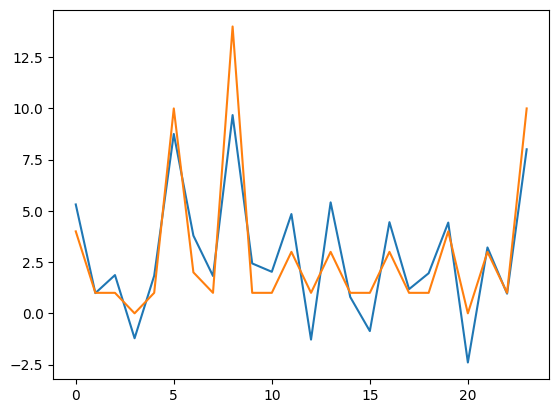

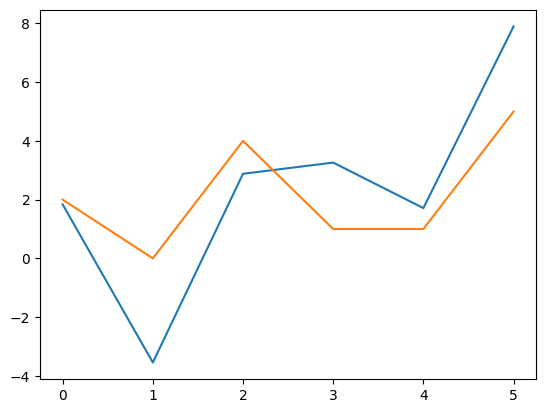

In [ ]:
plt.plot(X_train_1 @w)
plt.plot(y_train)
plt.show()
plt.plot(X_test_1 @w)
plt.plot(y_test)
plt.show()


* произведем отбор признаков

In [ ]:
import statsmodels.api as sm

def feature_selection(X, y, alpha=0.05):
    significant_features = []
    # X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    for i in range(len(p_values)):
        if p_values[i] < alpha:
            significant_features.append(i)

    return significant_features


In [ ]:
feature_selection(X,y)

[0, 1, 3]

In [ ]:
indices = np.array([0,1,3])
X_train_1 = X_train[:,indices]
X_test_1 = X_test[:,indices]
w = np.linalg.inv(X_train_1.T@X_train_1)@X_train_1.T@y_train
print("MSE train :", np.linalg.norm(X_train_1@w - y_train ))
print("MSE test :", np.linalg.norm(X_test_1@w - y_test ))

MSE train : 9.295739061284685
MSE test : 3.3477537535088255


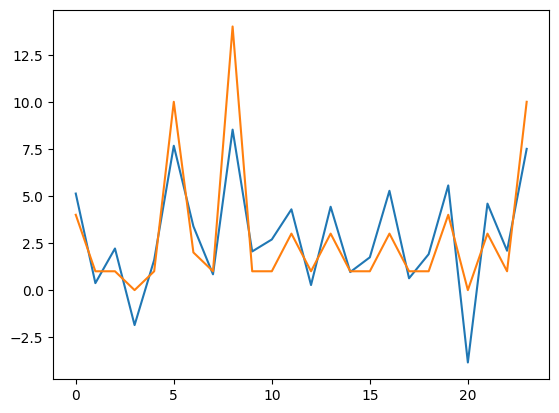

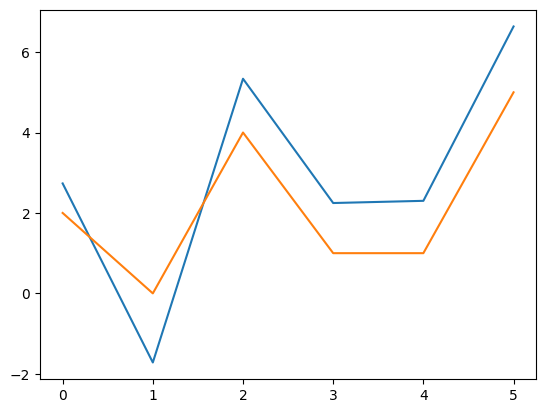

In [ ]:
plt.plot(X_train_1 @w)
plt.plot(y_train)
plt.show()
plt.plot(X_test_1 @w)
plt.plot(y_test)
plt.show()


* Как видим модель с использованием всего 3 признаков работает значительно лучше на тесте , чем модель исопльзующая все 10